# Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. The purpose of this repository is to apply this concept to a [database](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023) that contains information about salaries in the field of data science between the years 2020-2023.

**✏️Importing the required libraries for EDA.**

In [293]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.stats.api as sms
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
import country_converter as coco
init_notebook_mode(connected = True)
cmap1 = "gist_gray"
import warnings
warnings.filterwarnings('ignore')

**✏️Loading the data into the dataframe.**

In [294]:
df = pd.read_csv('ds_salaries.csv')

In [295]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


- **Dataset Description.**

Data Science Job Salaries Dataset contains 11 columns, each are :
- work_year          : The year the salary was paid.
- experience_level   : The experience level in the job during the year
- employment_type    : The type of employment for the role
- job_title          : The role worked in during the year.
- salary             : The total gross salary amount paid.
- salary_currency    : The currency of the salary paid as an ISO 4217 currency code.
- salaryinusd        : The salary in USD
- employee_residence : Employee's primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio       : The overall amount of work done remotely
- company_location   : The country of the employer's main office or contracting branch
- company_size       : The median number of people that worked for the company during the yea

In [296]:
print('The dataset contains {} row and {} columns.'.format(df.shape[0],df.shape[1]))
print('The size of dataset (rows x columns): ',df.size)

The dataset contains 3755 row and 11 columns.
The size of dataset (rows x columns):  41305


- **Dataset Information.**

The info() method prints information about the DataFrame.

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


We note that work_year, salary, remote_ratio, salary_in_usd  are in int64 format. We expect them to be integer numbers, so it is an appropriate data type. Keeping in mind that we do not have such high precision, we will change the data type to int32.  For the other columns, the DType column states object. This is not an actual type, but a placeholder for any kind of native Python object, such as list, dict, str, etc. The correct type for these columns is 'string'. So we apply a conversion.

In [298]:
df=df.astype({'work_year': 'int32', 'salary': 'int32', 'salary_in_usd': 'int32', 'remote_ratio': 'str','experience_level': 'str','employment_type' : 'str','job_title': 'str','salary_currency': 'str','employee_residence':'str','company_location': 'str','company_size': 'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int32 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int32 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int32 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   object
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int32(3), object(8)
memory usage: 278.8+ KB


- **Removing spaces.**

We remove spaces from columns containing character strings. These spaces can lead to unwanted errors.

In [299]:
df['experience_level']=df['experience_level'].str.strip()
df['employment_type']=df['employment_type'].str.strip()
df['job_title']=df['job_title'].str.strip()
df['salary_currency']=df['salary_currency'].str.strip()
df['employee_residence']=df['employee_residence'].str.strip()
df['company_location']=df['company_location'].str.strip()
df['company_size']=df['company_size'].str.strip()

✏️**Data Processing.**



For a better understanding we rename the columns.

In [300]:
experience_mapping = {
    'EN': 'Junior',
    'MI': 'Intermediate',
    'SE': 'Expert',
    'EX': 'Director'
}
employment_mapping = {
    'PT': 'Part-time',
    'FT': 'Full-time',
    'CT': 'Contract',
    'FL': 'Freelance'
}
remote_mapping = {
    '0': 'No remote work',
    '50': 'Partially remote',
    '100': 'Fully remote'
}
size_company_mapping = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}
df.loc[:, 'experience_level'] = df['experience_level'].replace(experience_mapping)
df.loc[:, 'employment_type'] = df['employment_type'].replace(employment_mapping)
df.loc[:, 'remote_ratio'] = df['remote_ratio'].replace(remote_mapping)
df.loc[:, 'company_size'] = df['company_size'].replace(size_company_mapping)

In [301]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Expert,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Fully remote,ES,Large
1,2023,Intermediate,Contract,ML Engineer,30000,USD,30000,US,Fully remote,US,Small
2,2023,Intermediate,Contract,ML Engineer,25500,USD,25500,US,Fully remote,US,Small
3,2023,Expert,Full-time,Data Scientist,175000,USD,175000,CA,Fully remote,CA,Medium
4,2023,Expert,Full-time,Data Scientist,120000,USD,120000,CA,Fully remote,CA,Medium


- **Dropping the duplicate rows.**

In [302]:
duplicate_rows = df.duplicated().sum()
print("Number of duplicated rows: ", duplicate_rows)
df = df.drop_duplicates()

Number of duplicated rows:  1171


In [303]:
print('The dataset contains {} row and {} columns.'.format(df.shape[0],df.shape[1]))

The dataset contains 2584 row and 11 columns.


- **Types of variables.**

We segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int.


1. **Categorical variables.**

In [304]:
categorical_var=[var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_var)))
print('The categorical variables are: ',categorical_var)

There are 8 categorical variables
The categorical variables are:  ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']


a) View the categorical variable.

In [305]:
df[categorical_var].head()

,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,Expert,Full-time,Principal Data Scientist,EUR,ES,Fully remote,ES,Large
1,Intermediate,Contract,ML Engineer,USD,US,Fully remote,US,Small
2,Intermediate,Contract,ML Engineer,USD,US,Fully remote,US,Small
3,Expert,Full-time,Data Scientist,USD,CA,Fully remote,CA,Medium
4,Expert,Full-time,Data Scientist,USD,CA,Fully remote,CA,Medium


b) Check missing values in categorical variables.

In [306]:
df[categorical_var].isnull().sum()

experience_level      0
employment_type       0
job_title             0
salary_currency       0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

c) Number of labels: cardinality.

The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, we will check for high cardinality.

In [307]:
for var in categorical_var:
    print(var, ' contains ', len(df[var].unique()), ' labels')

experience_level  contains  4  labels
employment_type  contains  4  labels
job_title  contains  93  labels
salary_currency  contains  20  labels
employee_residence  contains  78  labels
remote_ratio  contains  3  labels
company_location  contains  72  labels
company_size  contains  3  labels


d) Frequency of categorical variables.

In [308]:
import plotly.express as px
def frequency(var):
    ox=df[var].value_counts()
    fig = px.bar(y=ox.values,x = ox.index)
    fig.update_layout(title={'text': var,
                             'y':0.9,
                             'x':0.5,
                             'xanchor':'center',
                             'yanchor':'top'},
                              barmode='overlay',
                              yaxis=dict(title='Count'),
                              template='simple_white') 
    fig.show()    


In [309]:
for var in df[categorical_var]:
    frequency(var)

2. **Numerical variables.**

In [310]:
numerical_var=[var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical_var)))
print('The numerical variables are: ',numerical_var)

There are 3 numerical variables
The numerical variables are:  ['work_year', 'salary', 'salary_in_usd']


a) View the numerical variables.

In [311]:
df[numerical_var].head()

,work_year,salary,salary_in_usd
0,2023,80000,85847
1,2023,30000,30000
2,2023,25500,25500
3,2023,175000,175000
4,2023,120000,120000


b) Check missing values in numerical variables.

In [312]:
df[numerical_var].isnull().sum()

work_year        0
salary           0
salary_in_usd    0
dtype: int64

c) A summary of the statistics relating to the numerical variables.

In [313]:
round(df[numerical_var].describe(),2)

,work_year,salary,salary_in_usd
count,2584.00,2584.00,2584.00
mean,2022.30,210365.30,133409.28
std,0.75,808037.54,67136.84
min,2020.00,6000.00,5132.00
25%,2022.00,90000.00,84975.00
50%,2022.00,134630.00,130000.00
75%,2023.00,182562.50,175000.00
max,2023.00,30400000.00,450000.00


d) Outliers in numerical variables.

The following function allows us to visualize the distribution of numerical variables (salary, salary_in_usd) as well as the outliers. The visualization of these variables can be done considering the work_year variable.

In [314]:
def num_var_summary(dataframe,num_var,year):
    df1 = dataframe[(df.work_year == year)]
    fig = make_subplots(rows = 1, cols = 2,
                       subplot_titles = ("Quantiles", "Distribution"))
    
    fig.add_trace(go.Box(y = df1[num_var],
                         name = str(num_var),
                         showlegend = False,
                         marker_color = "#A6D0DD"), 
                         row = 1, col = 1)
    
    fig.add_trace(go.Histogram(x = df1[num_var],
                               name = str(num_var),
                               showlegend = False,
                               xbins = dict(start = df1[num_var].min(),
                                            end = df1[num_var].max()),
                               marker=dict(color='rgb(12, 12, 140)',
                                           line = dict(color = '#DBE6EC',
                                                       width = 1))),
                  row = 1, col = 2)
    
    fig.update_layout(title={'text':year,
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='seaborn')
    
    iplot(fig)

In [315]:
num_var_summary(df,"salary_in_usd",2023)

❗️There are several methods commonly used to treat outliers, depending on the nature of the data and the specific analysis being conducted.

- Deletion: This method involves simply removing the outliers from the dataset;
- Transformation: Transforming the data using mathematical functions can sometimes reduce the impact of outliers. Common transformations include taking the logarithm or square root. These transformations can help make the data more normally distributed and stabilize the variance.
- Winsorization: Winsorization replaces extreme data values with less extreme values. The process involves capping or truncating the extreme values at a certain percentile (e.g., replacing values above the 95th percentile with the value at the 95th percentile). This approach reduces the influence of outliers while still retaining some information from the extreme values.

❗️We remove outliers by IQR Method.


In [316]:
data = df.copy()
data = data.drop(categorical_var, axis=1)
data=data.drop(['work_year'],axis=1)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(2485, 2)

In [317]:
num_var_summary(data,"salary_in_usd",2023)

✏️**Correlation.**

- Creating Dummy variables.

❗️Dummy variables are numerical variables that represent the actual data. For instance, given male and female gender, we could give 0 to represent the males and 1 for the females. This gives an actual representation of the information and the information is in numerical format which can be integrated into the machine learning model.

In [318]:
dummy_variable = pd.get_dummies(df, columns=['experience_level','employment_type','remote_ratio','company_size'], drop_first=True)
dummy_variable = dummy_variable.drop(numerical_var, axis=1)
dummy_variable = dummy_variable.drop(['job_title','salary_currency','company_location','employee_residence'], axis=1)

In [319]:
dummy_variable

,experience_level_Expert,experience_level_Intermediate,experience_level_Junior,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time,remote_ratio_No remote work,remote_ratio_Partially remote,company_size_Medium,company_size_Small
0,True,False,False,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,True
2,False,True,False,False,False,False,False,False,False,True
3,True,False,False,False,True,False,False,False,True,False
4,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
3750,True,False,False,False,True,False,False,False,False,False
3751,False,True,False,False,True,False,False,False,False,False
3752,False,False,True,False,True,False,False,False,False,True
3753,False,False,True,False,False,False,False,False,False,False


- Scale the numerical variable.

In [320]:
scaler = StandardScaler()
scaled_numerical_var = scaler.fit_transform(df[numerical_var])
scaled_numerical_var_df = pd.DataFrame(scaled_numerical_var, columns=numerical_var)

- Concatenate the dummy variables with the scaled numerical vaariables.

In [321]:
processed_df = pd.concat([dummy_variable, scaled_numerical_var_df], axis=1)
processed_df = processed_df.drop(['work_year'], axis=1)

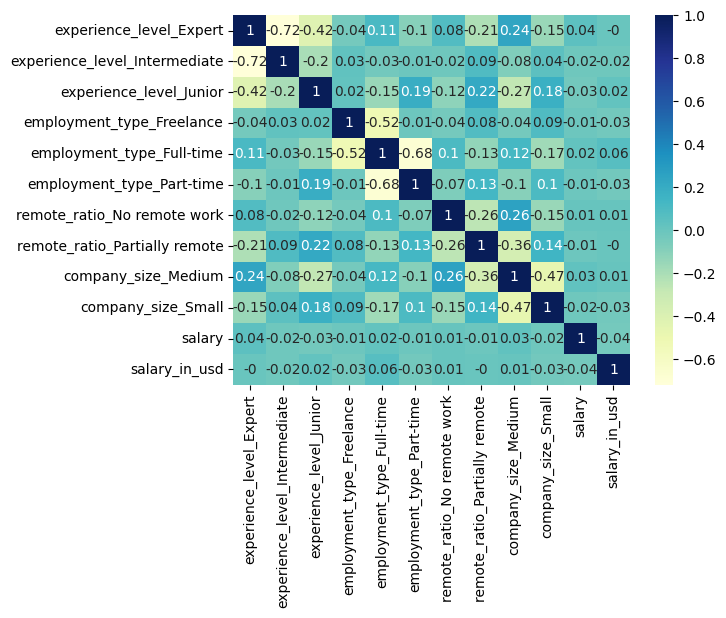

In [322]:
matrix=round(processed_df.corr(),2)
axis_corr = sns.heatmap(
matrix,cmap="YlGnBu", annot=True);
plt.show()

✏️**Vizualization.**

In [333]:
def country_view(var):
    country = coco.convert(names = df[var], to = "ISO3")
    df[var] = country
    residence = df[var].value_counts()
    var=str(var)
    var=var[:var.index('_')].capitalize()
    fig = px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    title = var+' Loaction On Map')
    fig.show()

- View company location on the map.

In [336]:
country_view('company_location')

- View employee location on the map.

In [338]:
country_view('employee_residence')